In [63]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [64]:
file_path = "Admission_Predict.csv"

In [65]:
df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
  "mohansacharya/graduate-admissions",
    file_path
)

In [66]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [67]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [68]:
df.rename(columns={'Chance of Admit ': 'Chance of Admit'}, inplace=True)

In [69]:
df.loc[df["Chance of Admit"]<0.8,"Chance of Admit"]=0
df.loc[df["Chance of Admit"]>=0.8,"Chance of Admit"]=1

In [70]:
X = df.drop(["Chance of Admit","Serial No."],axis=1)

In [71]:
y = df["Chance of Admit"]

# Without using Stratify (train-test split is random, no regard for imbalanced classes)

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [74]:
gini_clf = DecisionTreeClassifier(criterion="gini",random_state=4463)

In [75]:
gini_clf = gini_clf.fit(X_train, Y_train)

In [76]:
gini_pred = gini_clf.predict(X_test)

In [77]:
print("confusion matrix:\n")
print(metrics.confusion_matrix(Y_test, gini_pred))
print("1. Accuracy Score:", metrics.accuracy_score(Y_test, gini_pred))
print("2. Precision Score:",metrics.precision_score(Y_test, gini_pred))
print("3. Recall Score:", metrics.recall_score(Y_test, gini_pred))
print("4. f1 Score:", metrics.f1_score(Y_test, gini_pred))

confusion matrix:

[[62  5]
 [ 8 25]]
1. Accuracy Score: 0.87
2. Precision Score: 0.8333333333333334
3. Recall Score: 0.7575757575757576
4. f1 Score: 0.7936507936507936


In [78]:
entropy_clf = DecisionTreeClassifier(criterion="entropy",random_state=4463)

In [79]:
entropy_clf = entropy_clf.fit(X_train, Y_train)

In [80]:
entropy_pred = entropy_clf.predict(X_test)

In [81]:
print("confusion matrix:\n")
print(metrics.confusion_matrix(Y_test, entropy_pred))
print("1. Accuracy Score:", metrics.accuracy_score(Y_test, entropy_pred))
print("2. Precision Score:",metrics.precision_score(Y_test, entropy_pred))
print("3. Recall Score:", metrics.recall_score(Y_test, entropy_pred))
print("4. f1 Score:", metrics.f1_score(Y_test, entropy_pred))

confusion matrix:

[[64  3]
 [ 6 27]]
1. Accuracy Score: 0.91
2. Precision Score: 0.9
3. Recall Score: 0.8181818181818182
4. f1 Score: 0.8571428571428571


In [82]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [112]:
plt.figure(figsize=(80,20))

<Figure size 8000x2000 with 0 Axes>

<Figure size 8000x2000 with 0 Axes>

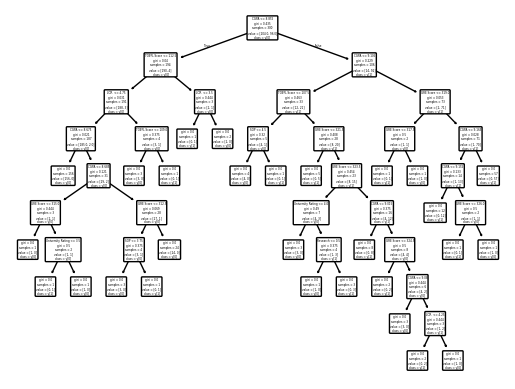

In [113]:
plot_tree(
    gini_clf,
    filled=False,                  # Color nodes by class
    rounded=True,                 # Rounded box edges
    feature_names=X_train.columns, # Show feature names on nodes
    class_names=True              # Show class names on nodes (set to list of class labels if you want)
)
plt.show()

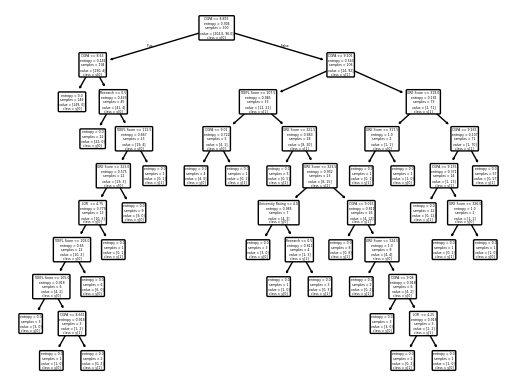

In [114]:
plot_tree(
    entropy_clf,
    filled=False,                  # Color nodes by class
    rounded=True,                 # Rounded box edges
    feature_names=X_train.columns, # Show feature names on nodes
    class_names=True              # Show class names on nodes (set to list of class labels if you want)
)
plt.show()

# Using Stratify (imbalanced classes taken into account for train-test split)

In [115]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state = 123, stratify=y)

In [116]:
gini_clf = DecisionTreeClassifier(criterion="gini",random_state=4463)

In [117]:
gini_clf = gini_clf.fit(X_train, Y_train)

In [118]:
gini_pred = gini_clf.predict(X_test)

In [119]:
print("confusion matrix:\n")
print(metrics.confusion_matrix(Y_test, gini_pred))
print("1. Accuracy Score:", metrics.accuracy_score(Y_test, gini_pred))
print("2. Precision Score:",metrics.precision_score(Y_test, gini_pred))
print("3. Recall Score:", metrics.recall_score(Y_test, gini_pred))
print("4. f1 Score:", metrics.f1_score(Y_test, gini_pred))

confusion matrix:

[[63  5]
 [10 22]]
1. Accuracy Score: 0.85
2. Precision Score: 0.8148148148148148
3. Recall Score: 0.6875
4. f1 Score: 0.7457627118644068


In [120]:
entropy_clf = DecisionTreeClassifier(criterion="entropy",random_state=4463)

In [121]:
entropy_clf = entropy_clf.fit(X_train, Y_train)

In [122]:
entropy_pred = entropy_clf.predict(X_test)

In [123]:
print("confusion matrix:\n")
print(metrics.confusion_matrix(Y_test, entropy_pred))
print("1. Accuracy Score:", metrics.accuracy_score(Y_test, entropy_pred))
print("2. Precision Score:",metrics.precision_score(Y_test, entropy_pred))
print("3. Recall Score:", metrics.recall_score(Y_test, entropy_pred))
print("4. f1 Score:", metrics.f1_score(Y_test, entropy_pred))

confusion matrix:

[[64  4]
 [ 9 23]]
1. Accuracy Score: 0.87
2. Precision Score: 0.8518518518518519
3. Recall Score: 0.71875
4. f1 Score: 0.7796610169491526


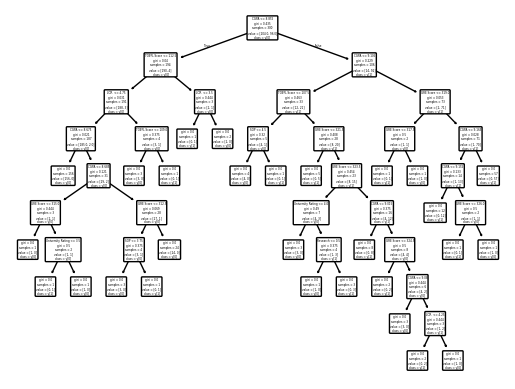

In [124]:
plot_tree(
    gini_clf,
    filled=False,                  # Color nodes by class
    rounded=True,                 # Rounded box edges
    feature_names=X_train.columns, # Show feature names on nodes
    class_names=True              # Show class names on nodes (set to list of class labels if you want)
)
plt.show()

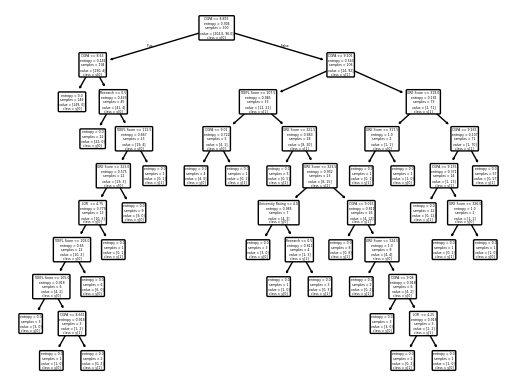

In [125]:
plot_tree(
    entropy_clf,
    filled=False,                  # Color nodes by class
    rounded=True,                 # Rounded box edges
    feature_names=X_train.columns, # Show feature names on nodes
    class_names=True              # Show class names on nodes (set to list of class labels if you want)
)
plt.show()

In [126]:
print(df['Chance of Admit'].value_counts())

Chance of Admit
0.0    272
1.0    128
Name: count, dtype: int64
